In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
vectores = pd.read_csv('vectores.csv')
df = pd.read_csv('datos_medianamente_finalizados.csv')

In [5]:
vectores.drop('Unnamed: 0', axis = 1, inplace= True)

In [6]:
vectores

,0,1,2,3,4,5,6,7,8,9,...,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370
0,0.594145,0.246437,0.359245,0.444175,0.374059,0.458054,0.346877,0.360458,0.331448,0.228025,...,0.410311,0.532415,0.435481,0.538915,0.682111,0.544713,0.459552,0.617470,0.531574,0.804255
1,0.691216,0.618709,0.503212,0.600012,0.464080,0.666682,0.506213,0.540776,0.539606,0.410058,...,0.358319,0.508880,0.680052,0.750197,0.637645,0.282369,0.289659,0.429833,0.486507,0.802437
2,0.816871,0.433482,0.408415,0.268261,0.165815,0.657298,0.713093,0.658567,0.677652,0.689119,...,0.676415,0.680042,0.676747,0.721951,0.896746,0.415512,0.508642,0.438008,0.519712,0.907831
3,0.741131,0.479897,0.643229,0.596230,0.659815,0.654134,0.656805,0.565796,0.366476,0.552591,...,0.538057,0.670430,0.487352,0.706935,0.677369,0.621319,0.574188,0.496201,0.640055,0.716464
4,0.854955,0.712003,0.611371,0.686622,0.542651,0.713905,0.725882,0.758238,0.671262,0.662846,...,0.552519,0.615038,0.731510,0.845359,0.695858,0.683862,0.670472,0.662146,0.708928,0.870093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.794804,0.527057,0.515324,0.696909,0.580757,0.620403,0.475480,0.535479,0.462129,0.467857,...,0.361823,0.450630,0.593872,0.714609,0.634097,0.482051,0.347374,0.345639,0.289292,0.815934
969,0.932756,0.737758,0.788752,0.812034,0.670201,0.747201,0.650073,0.732237,0.576079,0.610073,...,0.648079,0.677197,0.768561,0.808474,0.610408,0.588756,0.495343,0.513327,0.520787,0.887146
970,0.717519,0.779520,0.628927,0.713560,0.593405,0.418122,0.446829,0.317253,0.259121,0.206006,...,0.260862,0.279233,0.374267,0.566310,0.775961,0.477168,0.490487,0.403471,0.443236,0.664886
971,0.570631,0.464589,0.267072,0.517023,0.295485,0.591373,0.399658,0.482334,0.445643,0.333714,...,0.038618,0.593156,0.468760,0.734726,0.379816,0.256873,0.134448,0.259291,0.560102,0.687203


In [7]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [8]:
df['condition'].value_counts()

condition
CONT    591
AUT     382
Name: count, dtype: int64

In [9]:
df['labeled'] = df['condition'].map(
    {'AUT': 0, 
     'CONT': 1}
    
)



In [10]:
targets = df['labeled']

In [11]:
print(vectores.shape)
print(targets.shape)

(973, 4371)
(973,)


# Dimensionality reduction

- K means 
- DBSCAN
- 

Evaluation Metric
For our evaluation metric, we used the Area-Under the “Receiving Operating Characteric” (ROC) curve, or ROC-AUC. This metric, which is often used for binary classifiers, describes the probability that a given classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. The curve is creative by plotting the fraction of true positive out of the positive vs the fraction of false pasitive out of the negatives over various thresholds T. In general, a higher AUC indicates a better binary classification performance.

In [12]:
# K means
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vectores)
scaled_features == vectores

,0,1,2,3,4,5,6,7,8,9,...,4361,4362,4363,4364,4365,4366,4367,4368,4369,4370
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
vectores.iloc[0, :]

0       0.594145
1       0.246437
2       0.359245
3       0.444175
4       0.374059
          ...   
4366    0.544713
4367    0.459552
4368    0.617470
4369    0.531574
4370    0.804255
Name: 0, Length: 4371, dtype: float64

(array([  57.,  226.,  707., 1232., 1099.,  585.,  266.,  145.,   45.,
           9.]),
 array([-0.25407678, -0.1340982 , -0.01411963,  0.10585895,  0.22583753,
         0.34581611,  0.46579468,  0.58577326,  0.70575184,  0.82573042,
         0.945709  ]),
 <BarContainer object of 10 artists>)

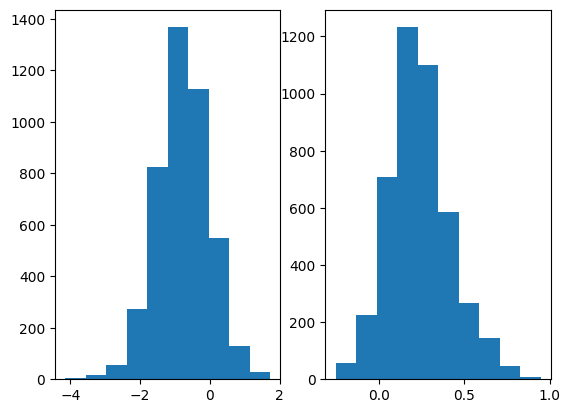

In [15]:
fig, ax = plt.subplots(1,2)
ax[0].hist(scaled_features[0])
ax[1].hist(vectores.iloc[0, :])


## K means

In [16]:
kmeans = KMeans(
    init= 'random', 
    n_clusters= 2, 
    n_init= 10, 
    max_iter= 300, 
    random_state= 3
)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=3)

In [17]:
# Statistics values

kmeans.inertia_

3071761.614667235

In [18]:
kmeans.cluster_centers_

array([[ 0.61663869,  0.70828526,  0.77471053, ...,  0.48193841,
         0.47555049,  0.52017318],
       [-0.40029257, -0.45978517, -0.50290531, ..., -0.31285154,
        -0.30870481, -0.33767174]])

In [19]:
kmeans.n_iter_

14

In [20]:
kmeans.labels_

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

### Choosing the right appropaite N clusters

In [21]:
k_means_kwargs = {
    'init': 'random', 
    'n_init': 10,
    'max_iter': 300, 
    'random_state': 3
    
    }

sse = []
label = []
for k in range (1,11):
    kmeans = KMeans(n_clusters= k, **k_means_kwargs)
    kmeans.fit(scaled_features)
    labels = kmeans.fit_predict(scaled_features)
    label.append(labels)
    sse.append(kmeans.inertia_)

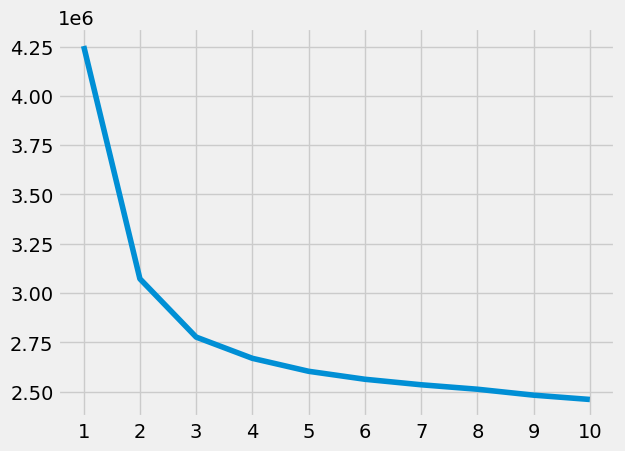

In [22]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.show()

In [23]:
k1 = KneeLocator(
    range(1,11), sse, curve= 'convex', direction= 'decreasing'
)
# Choosing the right number of clusters

k1.elbow

3

In [24]:
#f

kmeans_model = KMeans(n_clusters= 2)
kmeans_model.fit(scaled_features)


targets['clusters'] = kmeans_model.labels_.reshape(-1,1)
targets.head()

/home/earz/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_29034/1049154527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['clusters'] = kmeans_model.labels_.reshape(-1,1)


0    0
1    0
2    1
3    1
4    0
Name: labeled, dtype: object

In [25]:
targets

0                                                           0
1                                                           0
2                                                           1
3                                                           1
4                                                           0
                                  ...                        
969                                                         1
970                                                         0
971                                                         1
972                                                         1
clusters    [[1], [1], [0], [0], [0], [1], [1], [1], [1], ...
Name: labeled, Length: 974, dtype: object

In [26]:
labeles_cluster = pd.DataFrame(kmeans_model.labels_, columns= ['Cluster'])



In [27]:
labeles_cluster['targets'] = targets


In [28]:
vectores_dos = vectores
vectores_dos['cluster'] = labeles_cluster['Cluster']

In [29]:
vectores_dos

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,cluster
0,0.594145,0.246437,0.359245,0.444175,0.374059,0.458054,0.346877,0.360458,0.331448,0.228025,...,0.532415,0.435481,0.538915,0.682111,0.544713,0.459552,0.617470,0.531574,0.804255,1
1,0.691216,0.618709,0.503212,0.600012,0.464080,0.666682,0.506213,0.540776,0.539606,0.410058,...,0.508880,0.680052,0.750197,0.637645,0.282369,0.289659,0.429833,0.486507,0.802437,1
2,0.816871,0.433482,0.408415,0.268261,0.165815,0.657298,0.713093,0.658567,0.677652,0.689119,...,0.680042,0.676747,0.721951,0.896746,0.415512,0.508642,0.438008,0.519712,0.907831,0
3,0.741131,0.479897,0.643229,0.596230,0.659815,0.654134,0.656805,0.565796,0.366476,0.552591,...,0.670430,0.487352,0.706935,0.677369,0.621319,0.574188,0.496201,0.640055,0.716464,0
4,0.854955,0.712003,0.611371,0.686622,0.542651,0.713905,0.725882,0.758238,0.671262,0.662846,...,0.615038,0.731510,0.845359,0.695858,0.683862,0.670472,0.662146,0.708928,0.870093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.794804,0.527057,0.515324,0.696909,0.580757,0.620403,0.475480,0.535479,0.462129,0.467857,...,0.450630,0.593872,0.714609,0.634097,0.482051,0.347374,0.345639,0.289292,0.815934,1
969,0.932756,0.737758,0.788752,0.812034,0.670201,0.747201,0.650073,0.732237,0.576079,0.610073,...,0.677197,0.768561,0.808474,0.610408,0.588756,0.495343,0.513327,0.520787,0.887146,0
970,0.717519,0.779520,0.628927,0.713560,0.593405,0.418122,0.446829,0.317253,0.259121,0.206006,...,0.279233,0.374267,0.566310,0.775961,0.477168,0.490487,0.403471,0.443236,0.664886,1
971,0.570631,0.464589,0.267072,0.517023,0.295485,0.591373,0.399658,0.482334,0.445643,0.333714,...,0.593156,0.468760,0.734726,0.379816,0.256873,0.134448,0.259291,0.560102,0.687203,1


In [30]:
# Silhoute coefficient
silhouette_coefficients = []
labels = []
for k in range (2,11):
    kmeans = KMeans(n_clusters= k, **k_means_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)



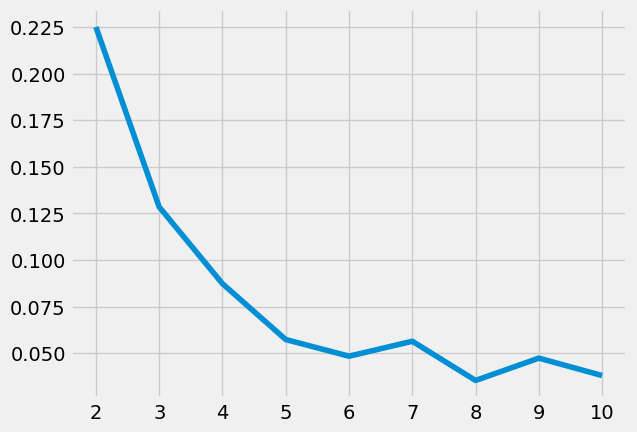

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.show()




In [53]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

## PCA 

In [31]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np 
import seaborn as sns           


In [32]:
vectores.drop('cluster', axis = 1, inplace= True)

<Axes: >

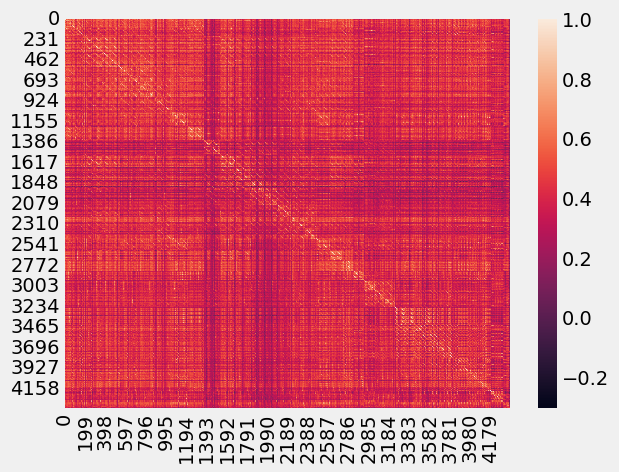

In [118]:
sns.heatmap(np.corrcoef(scaled_features, rowvar=False))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets, random_state= 3)

In [33]:
pca = PCA(n_components= 2)
pca.fit(scaled_features)
data_pca = pca.transform(scaled_features)


df_pca = pd.DataFrame(data_pca, columns= ['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-52.109118,-10.734532
1,-3.074585,-3.642377
2,50.296500,-8.029893
3,13.248563,-17.001469
4,61.755588,-6.283615
...,...,...
968,6.067351,-1.175465
969,21.179781,9.713265
970,3.747092,8.143828
971,-22.271579,-12.906810


<Axes: >

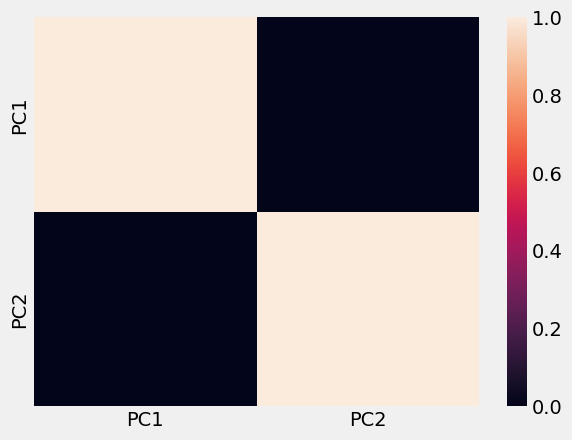

In [34]:
sns.heatmap(df_pca.corr())

In [35]:
df_pca['target'] = targets

df_pca

,PC1,PC2,target
0,-52.109118,-10.734532,0
1,-3.074585,-3.642377,0
2,50.296500,-8.029893,1
3,13.248563,-17.001469,1
4,61.755588,-6.283615,0
...,...,...,...
968,6.067351,-1.175465,1
969,21.179781,9.713265,1
970,3.747092,8.143828,0
971,-22.271579,-12.906810,1


In [140]:
df_pca.tail()

,PC1,PC2,PC3,target
968,6.067351,-1.174756,-0.557641,1
969,21.179781,9.713496,-11.207626,1
970,3.747092,8.144710,20.355134,0
971,-22.271579,-12.906247,-3.252708,1
972,-22.722998,-4.950998,6.232127,1


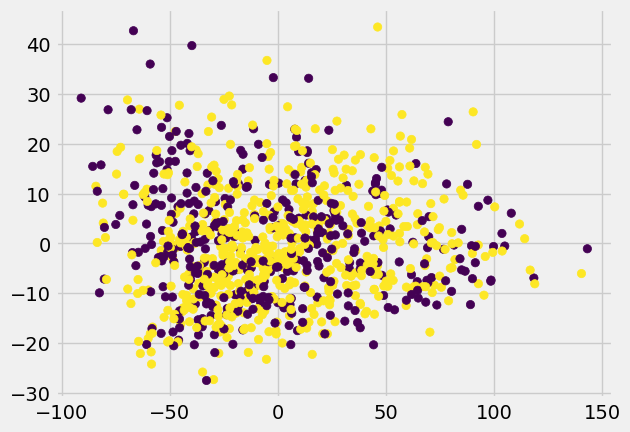

In [36]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c = df_pca['target'])

In [145]:
from mpl_toolkits import mplot3d



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


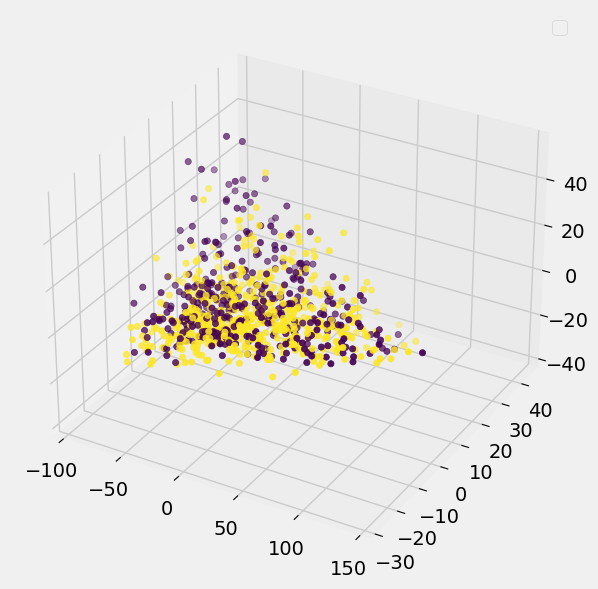

In [148]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c= df_pca['target'])
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## Classification task



In [56]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression 





In [79]:
target_pca.value_counts()

target
1    591
0    382
Name: count, dtype: int64

In [68]:
df_pca
target_pca = df_pca['target'].astype('int')
features = df_pca.drop('target', axis= 1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, target_pca, test_size= 0.3, shuffle= True, random_state= 3)


In [74]:
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confussion matrix \n', cm)



Confussion matrix 
 [[  1 103]
 [  1 187]]


LogisticRegression(random_state=3)

In [80]:
  
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6438356164383562
